In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
# Study data files
lck = "spring_2021/cleaned/lck_data_2021.csv"
lec = "spring_2021/cleaned/lec_data_2021.csv"
lpl= "spring_2021/cleaned/lpl_data_2021.csv"
lcs= "spring_2021/cleaned/lcs_data_2021.csv"
region = "spring_2021/region_games_2021.csv"
total = "spring_2021/cleaned/total_data_2021.csv"
min_d = "spring_2021/min_diversity_2021.csv"
max_d = "spring_2021/max_diversity_2021.csv"

# Read the data
lck_data = pd.read_csv(lck)
lec_data = pd.read_csv(lec)#, encoding = "ISO-8859-1")
lpl_data = pd.read_csv(lpl)
lcs_data = pd.read_csv(lcs)
min_diversity = pd.read_csv(min_d)
max_diversity = pd.read_csv(max_d)
region_data = pd.read_csv(region)
total_data = pd.read_csv(total)

In [3]:
region_data

,region,total_games
0,LCK,215
1,LCS,90
2,LEC,90
3,LPL,306


In [4]:
def champ_diversity(data,region):
    data = data.loc[(data['True Presence']>0)]
    plt.figure(figsize=(15,8))
    x=np.arange(len(data))
    plt.xticks(x[::3], data.Champion[::3],rotation=90, fontsize=10)
    plt.yticks(np.arange(0,110,10))
    plt.margins(x=0)
    plt.axhline(y=13.07189,ls='--',color='red',alpha=.75)
    plt.axhline(y=50,ls='--',color='purple',alpha=.75)
    
    plt.title(f'{region} Spring Split 2021 Champion Diversity')
    plt.ylabel('Presence, Picks + Bans (%)')
    
    plt.annotate('perfect diversity',(len(data.Champion)-20,14.5),color='red')
    plt.plot(data.Champion,data['True Presence'],color='dodgerblue')
    plt.gcf().subplots_adjust(bottom=0.18)
    plt.savefig(f"images_2021/{region[:3]}_diversity_2021.png")
    plt.show()
    
    print(f'{len(data)} unique champs were played')

In [5]:
def sim_diversity(data,region):
    data = data.loc[(data.Picks > 0) | (data.Bans > 0)]
    plt.figure(figsize=(15,8))
    x=np.arange(len(data))
    plt.xticks(x[::3], data.Champion[::3],rotation=90, fontsize=10)
    plt.yticks(np.arange(0,110,10))
    plt.margins(x=0)
    plt.axhline(y=13.07189,ls='-',color='darkblue',alpha=.75)
    
    plt.title(f'{region}')
    plt.ylabel('Presence, Picks + Bans (%)')
    
    plt.annotate('perfect diversity',(len(data.Champion)-20,14.5),color='darkblue')
    plt.annotate('no diversity\nsame 20 champs every game',(1,92),color='dodgerblue')
    plt.plot(data.Champion,data['True Presence'],color='dodgerblue')
    plt.gcf().subplots_adjust(bottom=0.18)
    plt.savefig(f"images_2021/{region[:3]}_diversity_2021.png")
    plt.show()


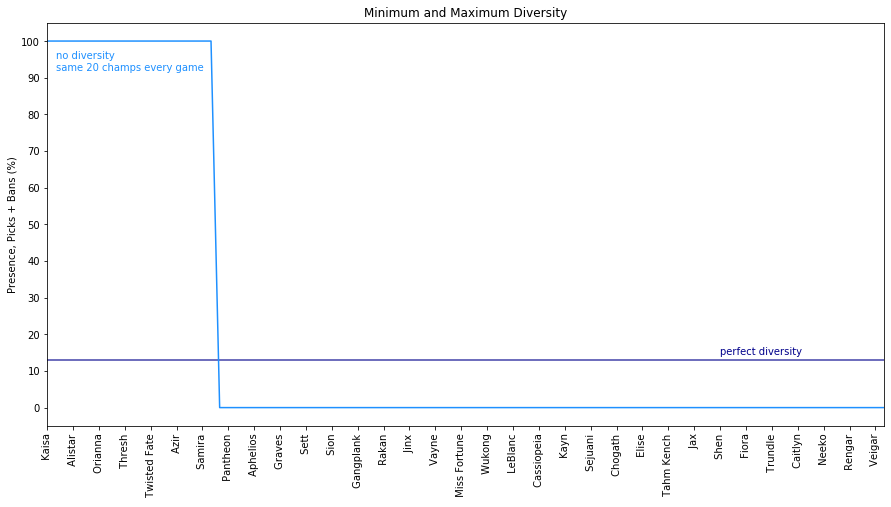

In [6]:
sim_diversity(min_diversity,'Minimum and Maximum Diversity')

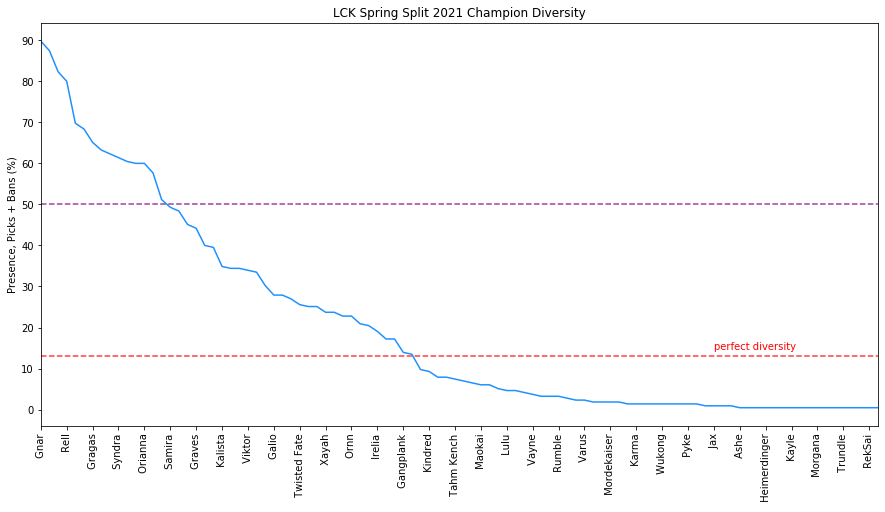

98 unique champs were played


In [7]:
champ_diversity(lck_data,'LCK')

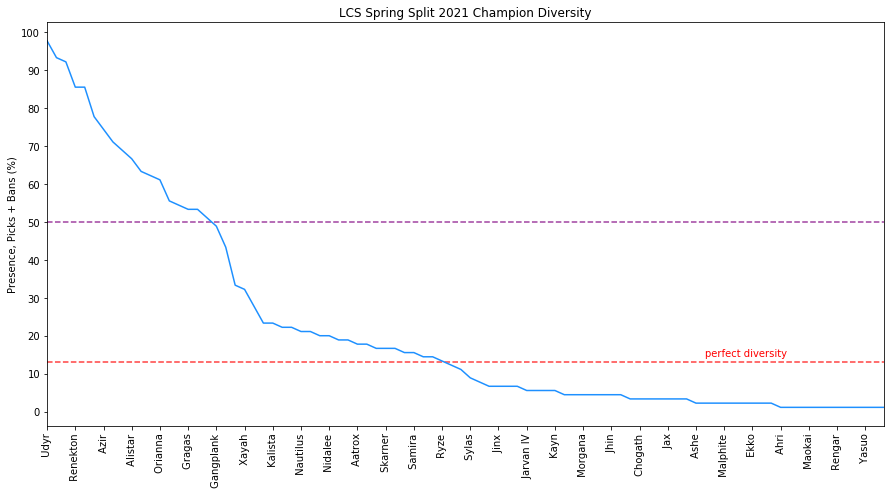

90 unique champs were played


In [8]:
champ_diversity(lcs_data,'LCS')

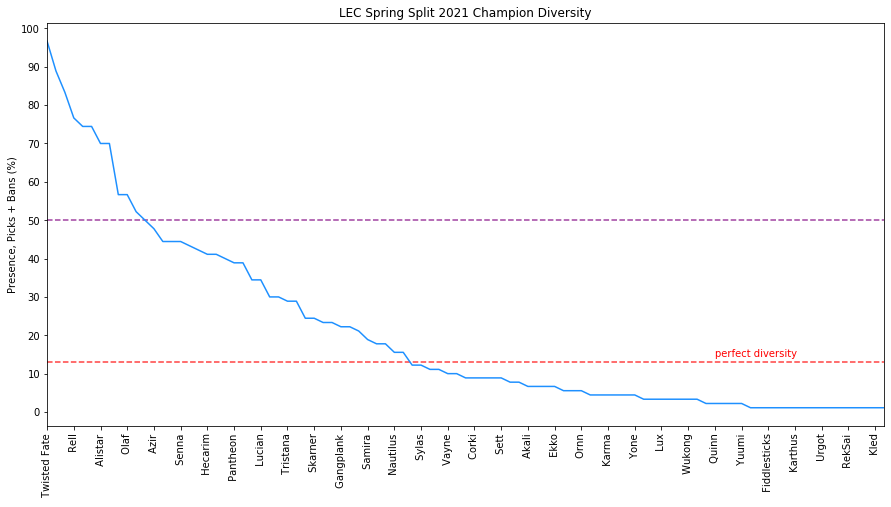

95 unique champs were played


In [9]:
champ_diversity(lec_data,'LEC')

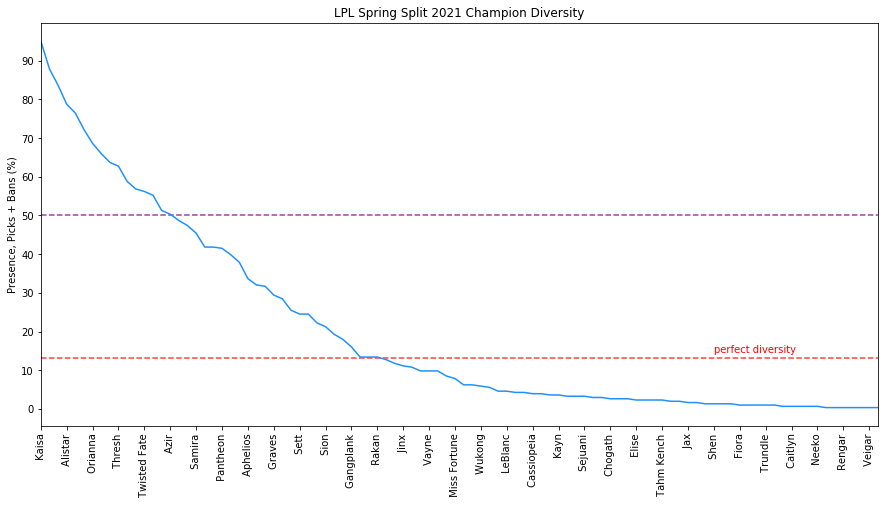

98 unique champs were played


In [10]:
champ_diversity(lpl_data,'LPL')

In [11]:
diversity_scale = (100-13.07189)*20 + 13.07189*(133)
def diversity_calc(data):
    return((1-sum([abs(i-13.07189) for i in data['True Presence']])/diversity_scale)*100)

In [12]:
region_list=['LCK','LEC','LCS','LPL','All']

diversity_list = [
diversity_calc(lck_data),
diversity_calc(lec_data),
diversity_calc(lcs_data),
diversity_calc(lpl_data),
diversity_calc(total_data)]

In [13]:
diversity_list

[26.04423560603325,
 30.1372168055818,
 27.454884881566866,
 26.80450976314832,
 28.434860267246552]

In [14]:
diversity_scale = pd.DataFrame({'region':region_list,'diversity':diversity_list})
#diversity_scale = diversity_scale.sort_values("diversity")
diversity_scale

,region,diversity
0,LCK,26.044236
1,LEC,30.137217
2,LCS,27.454885
3,LPL,26.804510
4,All,28.434860


In [15]:
# from functools import reduce

In [16]:
# data_frames=[lck_data,lcs_data,lpl_data,lec_data]
# total_data = reduce(lambda  left,right: pd.merge(left,right,on=['Champion'],
#                                             how='outer'), data_frames)

In [17]:
# pd.DataFrame.to_csv(total_data, 'spring_2020/total_data.csv', index=False)

In [18]:
total_data

,Champion,Picks_x,Bans_x,Picks_y,Bans_y,Picks_x.1,Bans_x.1,Picks_y.1,Bans_y.1,Picks,Bans,True Presence
0,Kaisa,153,35,56,21,168,123,52,23,429,202,90.014265
1,Renekton,56,121,28,49,100,169,29,34,213,373,83.594864
2,Gnar,81,112,31,31,124,132,25,20,261,295,79.315264
3,Alistar,89,58,39,21,157,84,40,23,325,186,72.895863
4,Rell,82,90,43,41,107,73,39,30,271,234,72.039943
...,...,...,...,...,...,...,...,...,...,...,...,...
148,Zed,0,0,0,0,0,0,0,0,0,0,0.000000
149,Zyra,0,0,0,0,0,0,0,0,0,0,0.000000
150,VelKoz,0,0,0,0,0,0,0,0,0,0,0.000000
151,Illaoi,0,0,0,0,0,0,0,0,0,0,0.000000


In [19]:
total_data[:20]

,Champion,Picks_x,Bans_x,Picks_y,Bans_y,Picks_x.1,Bans_x.1,Picks_y.1,Bans_y.1,Picks,Bans,True Presence
0,Kaisa,153,35,56,21,168,123,52,23,429,202,90.014265
1,Renekton,56,121,28,49,100,169,29,34,213,373,83.594864
2,Gnar,81,112,31,31,124,132,25,20,261,295,79.315264
3,Alistar,89,58,39,21,157,84,40,23,325,186,72.895863
4,Rell,82,90,43,41,107,73,39,30,271,234,72.039943
5,Udyr,66,84,18,70,125,70,20,47,229,271,71.326676
6,Olaf,67,62,22,61,108,113,17,34,214,270,69.044223
7,Thresh,44,86,16,33,71,121,17,63,148,303,64.336662
8,Gragas,78,62,29,19,103,99,31,20,241,200,62.910128
9,Orianna,78,51,33,22,115,95,31,16,257,184,62.910128


In [20]:
total_data1 = total_data.loc[total_data['True Presence']>0]
#total_data1

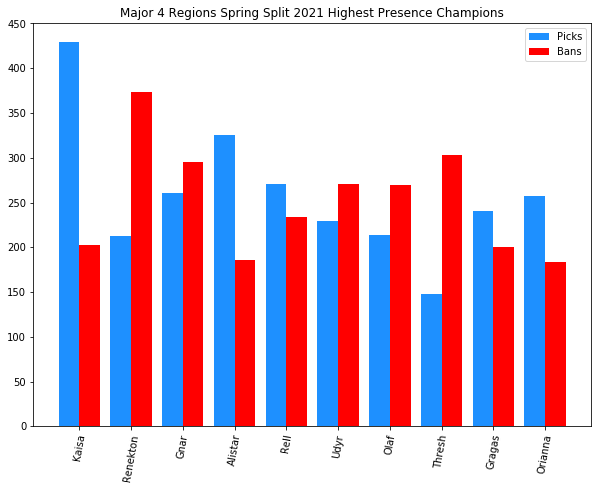

In [21]:
xtix=np.arange(10)
x = total_data[:10].Champion
y1= total_data[:10].Picks
y2 = total_data[:10].Bans

width = 0.4       # the width of the bars


plt.figure(figsize=(10,8))

ax = plt.subplot()
rects1 = ax.bar(xtix, y1,width, color='dodgerblue')

rects2 = ax.bar(xtix+width, y2, width, color='red')

# add some
#ax.set_ylabel('Scores')
ax.set_yticks(np.arange(0,500,50))
ax.set_title('Major 4 Regions Spring Split 2021 Highest Presence Champions')
ax.set_xticks(xtix + width / 2)
ax.set_xticklabels(x,rotation=80)
ax.legend( (rects1[0], rects2[0]), ('Picks', 'Bans') )
plt.gcf().subplots_adjust(bottom=0.18)

plt.savefig(f"images_2021/maj_presence.png")
plt.show()

In [22]:
ban_data = total_data.sort_values("Bans",ascending = False)
pick_data = total_data.sort_values("Picks",ascending = False)

In [23]:
def top_picks(data,region):
    
    data = data.sort_values("Picks",ascending = False)
    data = data.reset_index(drop=True)
    plt.figure(figsize=(10,8))
    if data.Picks[0]<100:
        ytix=np.arange(0,110,10)
        
    elif data.Picks[0]<250:
        ytix=np.arange(0,280,20)
        
    else:
        ytix=np.arange(0,600,50)
        
    
    plt.xticks(rotation=70)
    plt.yticks(ytix)
    
    plt.margins(x=.02)
    plt.title(f'{region} Spring Split 2021 Top Picked Champions')

    plt.bar(data.Champion[:15],data.Picks[:15],color='dodgerblue')
    plt.gcf().subplots_adjust(bottom=0.18)
    plt.savefig(f"images_2021/{region[:3]}_picks.png")
    plt.show()

In [24]:
def top_bans(data,region): 
    
    data = data.sort_values("Bans",ascending = False)
    data = data.reset_index(drop=True)
    plt.figure(figsize=(10,8))
    if data.Bans[0]<100:
        ytix=np.arange(0,110,10)
        
    elif data.Bans[0]<250:
        ytix=np.arange(0,280,20)
        
    else:
        ytix=np.arange(0,600,50)
        
    
    plt.xticks(rotation=70)
    plt.yticks(ytix)
    
    plt.margins(x=.02)
    plt.title(f'{region} Spring Split 2021 Top Banned Champions')

    plt.bar(data.Champion[:15],data.Bans[:15],color='red')
    plt.gcf().subplots_adjust(bottom=0.18)
    plt.savefig(f"images_2021/{region[:3]}_bans.png")
    plt.show()

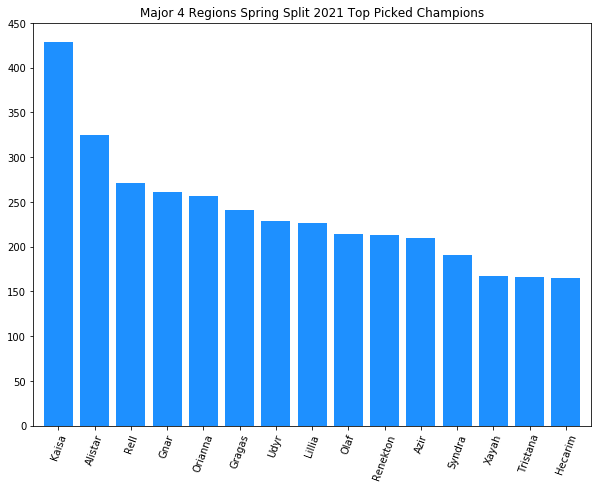

In [25]:
top_picks(total_data, 'Major 4 Regions')

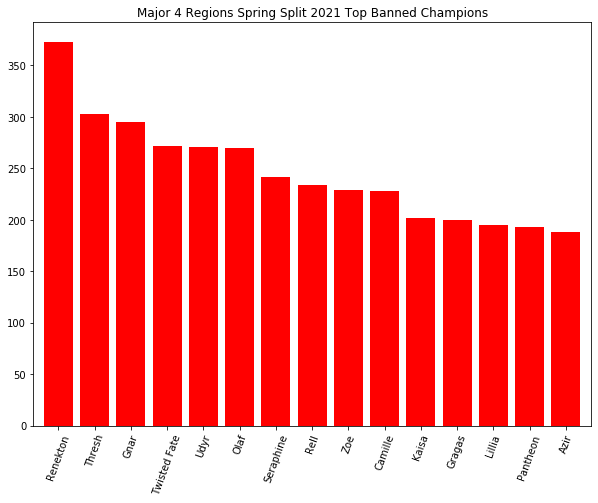

In [26]:
top_bans(total_data, 'Major 4 Regions')

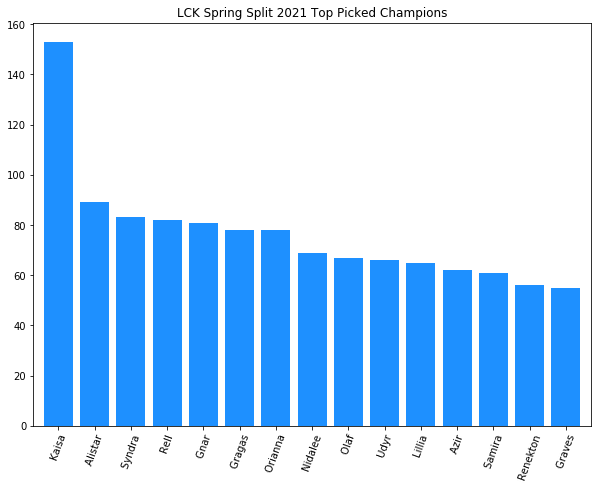

81

In [27]:
top_picks(lck_data,'LCK')
lck_data.Picks[0]

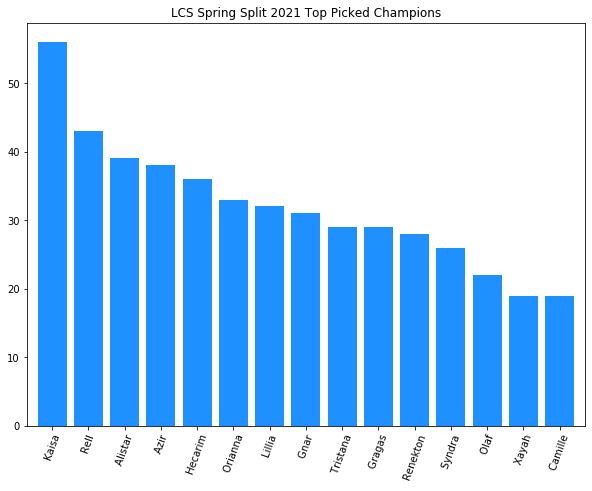

18

In [28]:
top_picks(lcs_data,'LCS')
lcs_data.Picks[0]

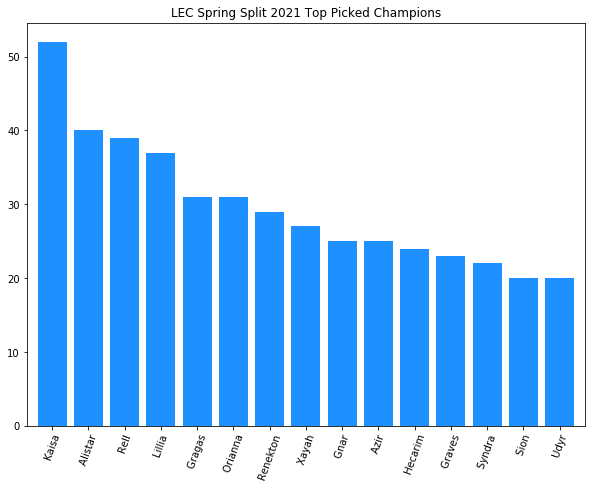

In [29]:
top_picks(lec_data,'LEC')

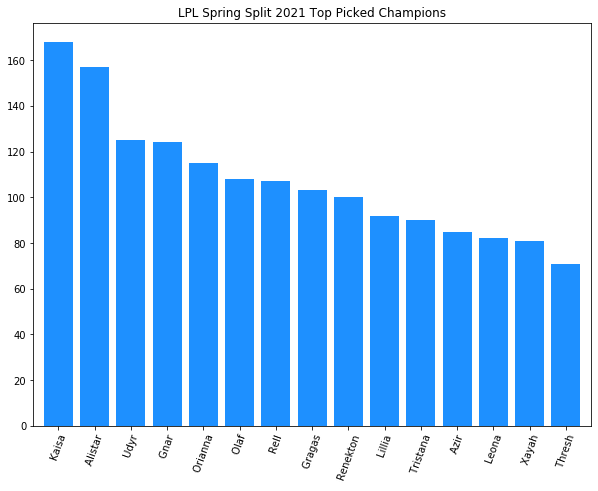

In [30]:
top_picks(lpl_data,'LPL')

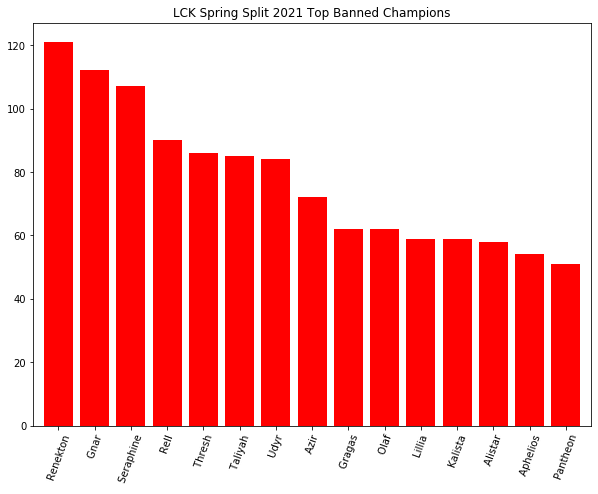

In [31]:
top_bans(lck_data,'LCK')

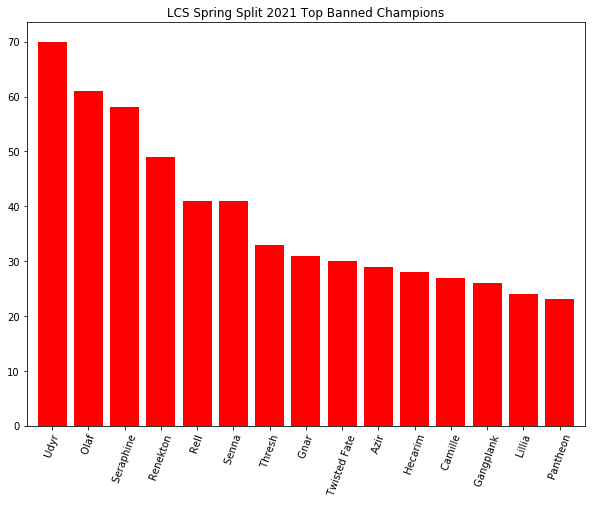

In [32]:
top_bans(lcs_data,'LCS')

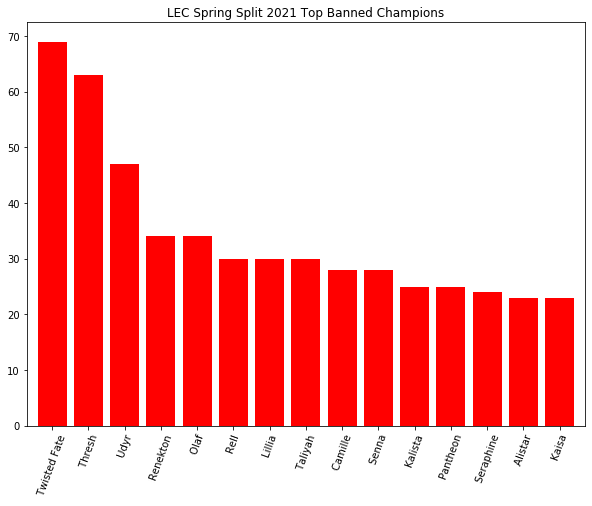

In [33]:
top_bans(lec_data,'LEC')

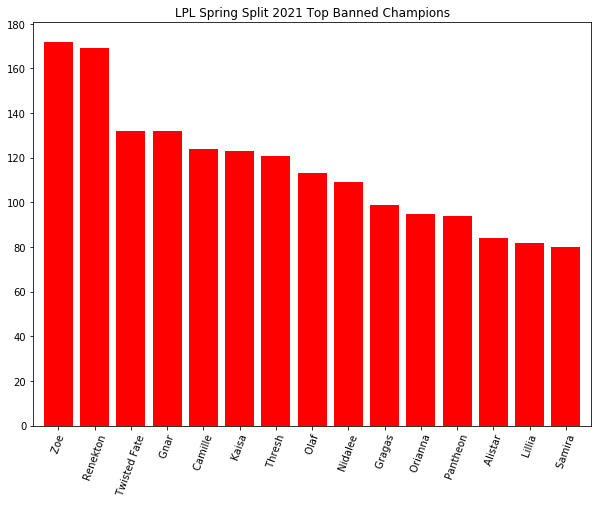

In [34]:
top_bans(lpl_data,'LPL')

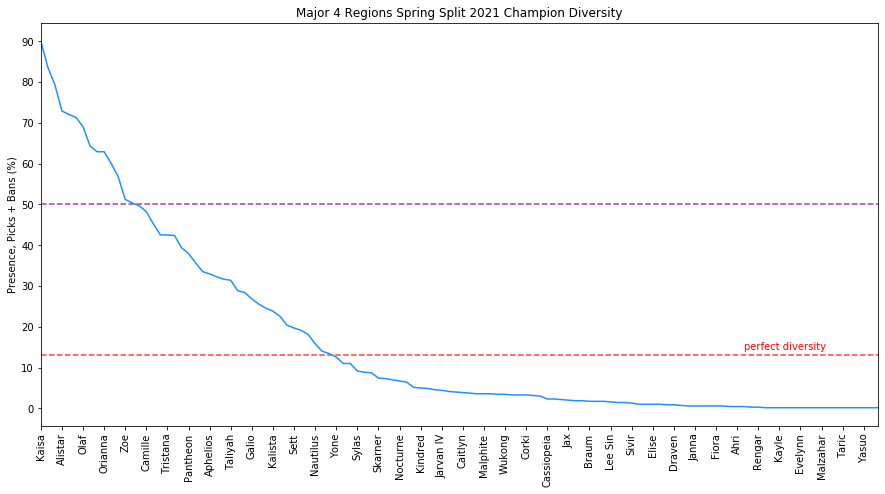

120 unique champs were played


In [35]:
champ_diversity(total_data,'Major 4 Regions')

In [36]:
#function looks at number of champions within certain presence

uniquelo = []
pres_50 = []
pres_30 = []
pres_perf = []
pres_1 = []



def meta_champs(data):
    data1 = data.loc[data['True Presence'] >= 50,['Champion','Picks','Bans','True Presence']]
    pres_50.append(len(data1))
    data2 = data.loc[data['True Presence'] >= 30,['Champion','Picks','Bans','True Presence']]
    pres_30.append(len(data2))
    data3 = data.loc[data['True Presence'] < 13.07189,['Champion','Picks','Bans','True Presence']]
    pres_perf.append(len(data3))
    data4 = data.loc[data['True Presence'] <= 1,['Champion','Picks','Bans','True Presence']]
    pres_1.append(len(data4))
    data5 = data.loc[data['True Presence'] > 0,['Champion','Picks','Bans','True Presence']]
    uniquelo.append(len(data5))
    return(len(data1),len(data2),len(data3),len(data4),data1.Champion)

In [37]:
#region_list=['LCK','LEC','LCS','LPL','All']

In [38]:
meta_champs(lck_data)

(15, 27, 109, 76, 0           Gnar
 1          Kaisa
 2       Renekton
 3           Rell
 4           Udyr
 5        Alistar
 6         Gragas
 7      Seraphine
 8           Azir
 9         Syndra
 10        Thresh
 11          Olaf
 12       Orianna
 13        Lillia
 14       Nidalee
 Name: Champion, dtype: object)

In [39]:
meta_champs(lec_data)

(12, 27, 112, 58, 0      Twisted Fate
 1            Thresh
 2             Kaisa
 3              Rell
 4              Udyr
 5            Lillia
 6           Alistar
 7          Renekton
 8            Gragas
 9              Olaf
 10          Orianna
 11             Gnar
 Name: Champion, dtype: object)

In [40]:
meta_champs(lcs_data)

(18, 22, 110, 63, 0           Udyr
 1           Rell
 2           Olaf
 3       Renekton
 4          Kaisa
 5      Seraphine
 6           Azir
 7        Hecarim
 8           Gnar
 9        Alistar
 10         Senna
 11        Lillia
 12       Orianna
 13      Tristana
 14        Thresh
 15        Gragas
 16        Syndra
 17       Camille
 Name: Champion, dtype: object)

In [41]:
meta_champs(lpl_data)

(16, 27, 113, 72, 0             Kaisa
 1          Renekton
 2              Gnar
 3           Alistar
 4               Zoe
 5              Olaf
 6           Orianna
 7            Gragas
 8              Udyr
 9            Thresh
 10             Rell
 11           Lillia
 12     Twisted Fate
 13          Camille
 14         Tristana
 15             Azir
 Name: Champion, dtype: object)

In [42]:
meta_champs(total_data)

(14, 28, 111, 68, 0            Kaisa
 1         Renekton
 2             Gnar
 3          Alistar
 4             Rell
 5             Udyr
 6             Olaf
 7           Thresh
 8           Gragas
 9          Orianna
 10          Lillia
 11            Azir
 12             Zoe
 13    Twisted Fate
 Name: Champion, dtype: object)

In [43]:
#look at which champs weren't played at all :(
sad = lcs_data.loc[lcs_data['True Presence'] ==0,['Champion','Picks','Bans','True Presence']]

In [44]:
sad_bois=sad.Champion.tolist()

In [45]:
sad.Champion

90             Akali
91             Amumu
92            Anivia
93             Annie
94             Brand
           ...      
148           Illaoi
149     Aurelion Sol
150             Pyke
151            Yuumi
152           Qiyana
Name: Champion, Length: 63, dtype: object

In [46]:
uniquelo

[98, 95, 90, 98, 120]

In [47]:
pres_50

[15, 12, 18, 16, 14]

In [48]:
pres_30

[27, 27, 22, 27, 28]

In [49]:
pres_1

[76, 58, 63, 72, 68]

In [50]:
diversity_scale['unique champions']=uniquelo
diversity_scale['# of champions with at least 50% presence']=pres_50
diversity_scale['# of champions with at least 30% presence']=pres_30
diversity_scale['# of champions less than perfect diversity presence (13.07%)']=pres_perf
diversity_scale['# of champions with less than 1% presence']=pres_1

In [51]:
diversity_scale

,region,diversity,unique champions,# of champions with at least 50% presence,# of champions with at least 30% presence,# of champions less than perfect diversity presence (13.07%),# of champions with less than 1% presence
0,LCK,26.044236,98,15,27,109,76
1,LEC,30.137217,95,12,27,112,58
2,LCS,27.454885,90,18,22,110,63
3,LPL,26.804510,98,16,27,113,72
4,All,28.434860,120,14,28,111,68


In [52]:
diversity_scale=diversity_scale.set_index('region')

In [53]:
diversity_scale.to_csv('spring_2021/comp.csv')

In [54]:
diversity_scale

,diversity,unique champions,# of champions with at least 50% presence,# of champions with at least 30% presence,# of champions less than perfect diversity presence (13.07%),# of champions with less than 1% presence
region,,,,,,
LCK,26.044236,98,15,27,109,76
LEC,30.137217,95,12,27,112,58
LCS,27.454885,90,18,22,110,63
LPL,26.804510,98,16,27,113,72
All,28.434860,120,14,28,111,68
